# Transformación en frecuencia

## Introducción

Las metodologías de diseño aprendidas en el curso nos permiten diseñar un filtro pasabajos.
En vez de aprender nuevos métodos para aproximar otros tipos de filtros, aprenderemos a hacer transformaciones en frecuencia.

Para lo mismo, se utiliza una función de transformación $K$, que mapea la variable compleja del filtro pasabajos en la variable compleja del filtro que queremos diseñar.
Introduciremos la siguiente simbología/terminología:

- $p = \Sigma + j \Omega$: variable compleja del filtro pasabajos.
- $s = \sigma + j \omega$: variable compleja de nuestro filtro objetivo.
- Núcleo de transformación $K$, el cual relaciona ambas variables de la forma $p=K(s)$.

Veremos en las siguientes secciones algunos de estos núcleos de transformación.

El procedimiento de diseño se puede reducir en las siguientes etapas:

* Se normaliza la plantilla del filtro pedido.
* A partir de la plantilla del filtro normalizada y haciendo uso de la función de transformación $K$, se obtiene la plantilla del filtro pasabajos equivalente.
* Se obtiene la transferencia $H_{LP}(p)$, utilizando algunas de las funciones de aproximacción conocidas.
* Alternativa A:
  * Se usa el núcleo de transformación $K(s)$ para obtener la función transferencia objetivo: $H(s) = H_{LP}(K(s))$
  * Se utiliza algún metodo circuital para diseñar $H(s)$.
* Alternativa B:
  * Se diseña un circuito pasabajos que cumpla la transferencia $H_{LP}(p)$.
  * Se utiliza el núcleo de transformación $K$ para hacer una transformación a nivel componentes, y obtener el circuito objetivo.

Como veremos luego, la "Alternativa B" es más conveniente a la hora de diseñar circuitos pasivos, pero no se la puede utilizar en el diseño de circuitos activos.
Esta transformación se la puede usar sin necesidad de conocer el modelo matemático de la función transferencia, es decir, aplicarla directo a un circuito de un filtro pasabajos sin disponer de su modelo matemático $H_{LP}(s)$.
Tampoco nos permite conocer directamente la $H(s)$ del filtro final, la cual se requiere un paso adicional para conocerla.

La "Alternativa A" se la puede utilizar siempre que tengamos disponible la transferencia $H_{LP}(p)$.


## Núcleos de transformación

### Lineamientos generales

- Teniendo en cuenta que las fuciones transferencia son racionales, el núcleo de transformación debera transformar funciones racionales en funciones racionales.
  Por lo tanto, no queda otra opción a usar una fución racional como núcleo de transformación.

- Los mapeos buscan transformar el eje de la frecuencia del filtro pasabajos prototipo ($j \Omega$) unívocamente en el eje de las frecuencias del filtro objetivo ($j\omega$).
  Para cumplir esto, la funcion racional debe ser el cociente de un polinomio par y uno impar o viceversa, teniendo una diferencia de grado de 1.

- Se busca la transformación más sencilla posible, debido a que aumentar el grando del polinomio numerador o denominador de la misma introducira singularidades adicionales en el filtro objetivo.

- La función de transformación tiene ceros en la banda de pasa del filtro objetivo, y polos en su banda de eliminación.
  De esta forma, se logra mapear la banda de paso del mismo en la banda de paso del pasabajos, y lo mismo con la banda de eliminación.

### Pasaaltos ($H_{HP}$)

La transformación pasabajos-pasaaltos es la más sencilla de todas.
Como plantilla normalizada de los mismos utilizaremos:
- El filtro atenúa a lo sumo $\alpha_{max}$, desde $\omega = \omega_p = 1$ haste $\omega -> \infty$.
- El filtro atenúa al menos $\alpha_{min}$, desde $\omega = 0$ hasta $\omega = \omega_s$.
- El intervalo $[\omega_s, \omega_p]$ se lo conoce como banda de transición.

A continuación, se ve un ejemplo de una plantilla pasaaltos:

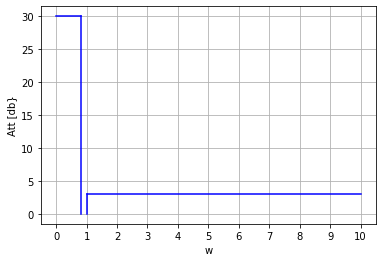

In [1]:
import numpy as np
import matplotlib.pyplot as plt

w_banda_paso = np.linspace(1, 10)
w_banda_att = np.linspace(0, 0.8)  # Para el caso particular w_s=0.8
att_min = 30 # dB
att_max = 3  # dB

# Lineas verticales para mejor visualizacion
vertical_banda_paso = np.linspace(0, att_max)
vertical_banda_att = np.linspace(0, att_min)

# Ploteo
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False)
ax.set_ylabel('Att [db}')
ax.set_xlabel('w')
ax.grid(True)
ticks = range(0, 11)
ax.set_xticks(ticks)
ax.plot(w_banda_paso, [att_max] * len(w_banda_paso), '-b')
ax.plot(w_banda_att, [att_min] * len(w_banda_att), '-b')
ax.plot([1] * len(vertical_banda_paso), vertical_banda_paso, '-b')
ax.plot([0.8] * len(vertical_banda_att), vertical_banda_att, '-b')

plt.show()

El objetivo de esta transformación es el siguiente:

- Mapear $\Omega=0$ en $\omega=\infty$, de forma de asegurar que el comportamiento en alta frecuencia del filtro pasaaltos es el mismo que el comportamiento en baja frecuencia del filtro pasabajos equivalente.
- Mapear $\Omega=1$ en $\omega=1$, así asegurando que la atenuación en el fin de la banda de paso de ambos filtros coincide.
- Mapear la banda de paso del pasabajos en forma continua en la banda de paso del pasaaltos.

La transformación más sencilla que cumple estas condiciones es:

$p = K(s) = \frac{1}{s}$

Podemos ver como transforma el eje de las frecuencias:

$\Omega = \frac{-1}{\omega}$

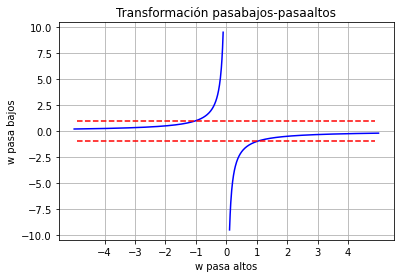

In [2]:
# Frec pasaaltos
w_hp = np.linspace(-5, 5, num=1000)
# Elimino punto cercanos al origen y separo positivos de negativos
# para evitar que una la asintota con una linea discontinua
w_hp_1 = w_hp[w_hp > 0.1]
w_hp_2 = w_hp[w_hp < -0.1]
w_hp = w_hp_1 + w_hp_2

# Frec pasabajos prototipo
w_lp_1 = -1 / w_hp_1
w_lp_2 = -1 / w_hp_2
# Lineas de referencia
line_1 = [1] * len(w_hp)
line_minus_1 = [-1] * len(w_hp)

# Ploteo
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False)
ax.set_ylabel('w pasa bajos')
ax.set_xlabel('w pasa altos')
ax.grid(True)
ticks = range(-4, 5)
ax.set_xticks(ticks)
title = 'Transformación pasabajos-pasaaltos'
ax.set_title(title)
ax.plot(w_hp_1, w_lp_1, '-b')
ax.plot(w_hp_2, w_lp_2, '-b')
ax.plot(w_hp, line_1, '--r')
ax.plot(w_hp, line_minus_1, '--r')

plt.show()

Como se ve en el gráfico, toda la banda de paso del pasa-altos ($[1, \infty]$) fue mapeada a la banda de paso del pasa-bajos ($[0, 1]$).
Para asegurarnos de que pasa lo mismo con la banda de eliminación, deberemos elegir:

$\Omega_s = 1 / \omega_s$

Como se transforma la plantilla del pasaaltos en la plantilla de un pasabajos prototipo se resume en la siguiente tabla:

| Pasa altos normalizado   | Pasa bajos prototipo                  |
|:------------------------:|:-------------------------------------:|
| $\omega_p = 1$           | $\Omega_p = \frac{1}{\omega_p} = 1$   |
| $\omega_s$               | $\Omega_s = \frac{1}{\omega_s}$       |
| $\alpha_{max}$           | $\alpha_{max}$                        |
| $\alpha_{min}$           | $\alpha_{min}$                        |

### Pasabanda ($H_{BP}$)

Desarrollaremos ahora la transformación pasabanda.
Un filtro pasabanda se define con la siguiente plantilla:

- El filtro atenúa a lo sumo $\alpha_{max}$, desde $\omega = \omega_{p1}$ hasta $\omega = \omega_{p2}$.
- El filtro atenúa al menos $\alpha_{min}$, desde $\omega = 0$ hasta $\omega = \omega_{s1}$, y desde $\omega = \omega_{s2}$ hasta $\omega -> \infty$.
- Los intervalos $[\omega_{s1}, \omega_{p1}]$ y $[\omega_{p2}, \omega_{s2}]$ son las bandas de transición.

A continuación, se muestra un ejemplo de plantilla:

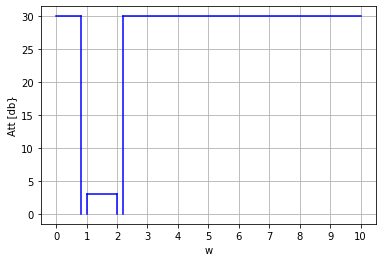

In [3]:
w_banda_paso = np.linspace(1, 2)  # Para el caso particular w_p1=1 w_p2=2
w_banda_att_1 = np.linspace(0, 0.8)  # w_s1=0.8
w_banda_att_2 = np.linspace(2.2, 10) # w_s2=2.2
att_min = 30 # dB
att_max = 3  # dB

# Lineas verticales para mejor visualizacion
vertical_banda_paso = np.linspace(0, att_max)
vertical_banda_att = np.linspace(0, att_min)

# Ploteo
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False)
ax.set_ylabel('Att [db}')
ax.set_xlabel('w')
ax.grid(True)
ticks = range(0, 11)
ax.set_xticks(ticks)
ax.plot(w_banda_paso, [att_max] * len(w_banda_paso), '-b')
ax.plot(w_banda_att_1, [att_min] * len(w_banda_att_1), '-b')
ax.plot(w_banda_att_2, [att_min] * len(w_banda_att_2), '-b')
ax.plot([1] * len(vertical_banda_paso), vertical_banda_paso, '-b')
ax.plot([2] * len(vertical_banda_paso), vertical_banda_paso, '-b')
ax.plot([0.8] * len(vertical_banda_att), vertical_banda_att, '-b')
ax.plot([2.2] * len(vertical_banda_att), vertical_banda_att, '-b')

plt.show()

Diseñaremos filtros pasabanda que presentan simetría geométrica respecto a una frecuencia central $\omega_0$, es decir:

### $H(\omega) = H(\frac{\omega^2_0}{\omega})$

Las funciones transferencias con esta característica se ven simétricas cuando el eje de la frecuencia se dibuja en escala logarítmica --como en un gráfico de Bode--.

Para lograr que en las frecuencias $\omega_{p1}$ y $\omega_{p2}$ haya la misma atenuación, elegiremos a $\omega_0$ como:

### $\omega_0 = \sqrt{\omega_{p1} \cdot \omega_{p2}}$

Las frecuencias $\omega_{s1}$ y $\omega_{s2}$ no tienen porque cumplir esta simetría, veremos como nos afecta esto luego.

Elegiremos la transformación de forma que la frecuencia central $\omega_0$ se mapeé a la respuesta en continua del pasabajos $\Omega=0$.
Por lo tanto, la transformación debera tener un cero en $\omega_0$:

### $K(s) = (s^2 + w^2_0) \cdot K_2(s)$

También, queremos que el comportamiento en continua y alta frecuencia del pasabanda sea de eliminación, idealmente mapeandose al comportamiento del pasabajos en $\omega -> \infty$.
Para eso, la transformación debe tener un polo tanto en $\omega = 0$ como en $\omega -> \infty$.
Agregandole un polo en el origen a la transformación anterior, logramos ese comportamiento dado que $(s^2 + w^2_0)$ también se puede ver como un polo en el infinito:

### $p = K(s) = A \cdot \frac{s^2 + w^2_0}{s}$

### $\Omega = \frac{K(j\omega)}{j} = A \cdot \frac{\omega^2 - \omega^2_0}{\omega}$

Nos queda por determinar como se relaciona la constante $A$ con nuestra plantilla.
Primero, grafiquemos como mapea esta transformación al eje de las frecuencias, para $A=1$ y $\omega_0=1$. 

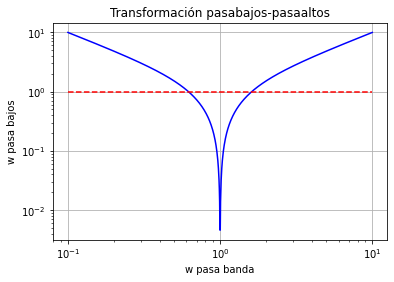

In [13]:
# Frec pasabanda
w_bp = np.logspace(np.log10(0.1), np.log10(10), num=1000)
# Frec pasabajos prototipo
# Calculamos el modulo, ya que no nos importa si frecuencias positivas pasan a negativas
w_lp = abs((1 - w_bp ** 2) / w_bp)

# Lineas de referencia
line_1 = [1] * len(w_bp)
line_minus_1 = [-1] * len(w_bp)

# Ploteo
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False)
ax.set_ylabel('w pasa bajos')
ax.set_xlabel('w pasa banda')
ax.grid(True)
title = 'Transformación pasabajos-pasaaltos'
ax.set_title(title)
ax.loglog(w_bp, w_lp, '-b')
ax.loglog(w_bp, line_1, '--r')
ax.loglog(w_bp, line_minus_1, '--r')

plt.show()

Vemos que la transformación tiene el efecto deseado, mapeando cierta banda alrededor de la frecuencia central a valores de $\Omega$ menores a 1.
Es decir, a la banda de paso del filtro prototipo.

También se observa que la transformación misma presenta simetría geométrica respecto a la frecuencia central!
Como habíamos anticipado.

Nos falta determinar como afecta el parámetro $A$ a la transformación.
Para ello, vamos a buscar los valores de $\omega$ que se mapean al fin de la banda de paso de nuestro prototipo (i.e.: $\Omega=\pm 1$):

### $\Omega = 1 = A \cdot  \frac{\omega_p^2 - \omega^2_0}{\omega_p}$

### $\omega_p^2 - \frac{\omega_p}{A} - \omega^2_0 = 0$

### $\omega_p = \frac{1}{2\cdot A} \pm \sqrt{\frac{1}{4\cdot A^2} + \omega^2_0}$

Vemos que solo usando el signo $+$ obtenemos una frecuencia positiva.
Para la otra condición:

### $\Omega = -1 = A \cdot  \frac{\omega_p^2 - \omega^2_0}{\omega_p}$

### $\omega_p^2 + \frac{\omega_p}{A} - \omega^2_0 = 0$

### $\omega_p = - \frac{1}{2\cdot A} \pm \sqrt{\frac{1}{4\cdot A^2} + \omega^2_0}$

Son los opuestos de las dos frecuencias que obtuvimos antes.
Nos queda:

### $\omega_{p1} = - \frac{1}{2\cdot A} \pm \sqrt{\frac{1}{4\cdot A^2} + \omega^2_0}$

### $\omega_{p2} = \frac{1}{2\cdot A} \pm \sqrt{\frac{1}{4\cdot A^2} + \omega^2_0}$

Y por lo tanto:

### $BW = \omega_{p2} - \omega_{p1} = \frac{1}{A}$

Con esto nos queda la transformación como:

### $p = K(s) = \frac{s^2 + w^2_0}{s\cdot BW} = Q \cdot  \frac{s^2 + w^2_0}{s \cdot  \omega_0}$

En el último paso introducimos el concepto de factor de selectividad del pasabandas ($Q$), definido como:

### $Q = \frac{\omega_0}{BW}$

No debe confundirse al mismo con el $Q$ de un par de polos, aunque para un filtro pasabandas de segundo orden ambos coinciden.

Por último, veamos como se relaciona la plantilla de nuestro filtro pasabandas con la de nuestro filtro pasabajos prototipo.
Lo primero que haremos es normalizar la plantilla de nuestro pasabanda con $\omega_0$.
Con eso nos queda la siguiente transformación:

### $p = K(s) = Q \cdot  \frac{s^2 + 1}{s}$

Nuestra plantilla del pasabanda especificaba también los bordes de la banda de atenuación $\omega_{s1}$, $\omega_{s2}$.
Estos se mapearan en dos frecuencias distintas $\Omega_{s1}$, $\Omega_{s2}$; y elegiremos la menor de ellas para asegurarnos que nuestro diseño cumpla las condiciones exigidas.
En el caso particular de $\omega_{s1} \cdot  \omega_{s2} = \omega^2_0$, ambas frecuencias se mapearan en una misma $\Omega_s$.

La siguiente tabla resume como se relacionan ambas plantillas:

| Pasa banda normalizado | Pasa bajos prototipo |
|:---:|:---:|
| $\omega_{p1}$, $\omega_{p2}$ | $\left|\Omega_{p1;2} = Q \cdot \frac{1-\omega_{p1;2}^2}{\omega_{p1;2}}\right| = 1$ |
| $\omega_{s1}$, $\omega_{s2}$ | Elegir a $\Omega_s$ como la menor de $\Omega_{s1}$, $\Omega_{s2}$ |
| $\alpha_{max}$ | $\alpha_{max}$ |
| $\alpha_{min}$ | $\alpha_{min}$ |

### Elimina banda ($H_{BS}$)

Nos queda por analizar los filtros eliminabanda.
Sin necesidad de mucha imaginación, podemos afirmar que aplicar una transformación pasabajos-pasaaltos seguida de una transformación pasabajos-pasabanda resultara en una transformación pasabajos-eliminabanda:

### $p = K_{BS}(s) = K_{HP}(K_{BP}(s)) = \frac{s\cdot BW}{s^2 + w^2_0} = \frac{1}{Q} \cdot \frac{s \cdot \omega_0}{s^2 + w^2_0}$

El siguiente gráfico muestra como funciona el mapeo $\omega_0=1$ y $Q=1$.

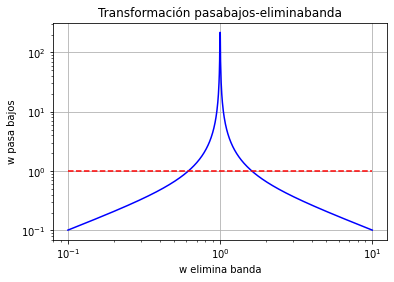

In [5]:
# Frec eliminabanda
w_bs = w_bp
# Frec pasabajos prototipo
w_lp = 1 / w_lp

# Lineas de referencia
line_1 = [1] * len(w_bp)
line_minus_1 = [-1] * len(w_bp)

# Ploteo
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False)
ax.set_ylabel('w pasa bajos')
ax.set_xlabel('w elimina banda')
ax.grid(True)
title = 'Transformación pasabajos-eliminabanda'
ax.set_title(title)
ax.loglog(w_bp, w_lp, '-b')
ax.loglog(w_bp, line_1, '--r')
ax.loglog(w_bp, line_minus_1, '--r')

plt.show()

Vemos como la misma mapea frecuencias cercanas a $omega_0$ a valores de $\Omega$ mayores a 1, como se pretende.

La relación con la plantilla del pasabajos prototipo se muestra en la siguiente tabla:

| Elimina banda normalizado | Pasa bajos prototipo |
|:---:|:---:|
| $\omega_{p1}$, $\omega_{p2}$ | $\Omega_p = \frac{1}{\omega_p} = 1$ |
| $\omega_{s1}$, $\omega_{s2}$ | Elegir a $\Omega_s$ como la menor de $\Omega_{s1}$, $\Omega_{s2}$ |
| $\alpha_{max}$ | $\alpha_{max}$ |
| $\alpha_{min}$ | $\alpha_{min}$ |

## Transformación de las singularidades

Al aplicar una transformación en frecuencia, las singularidades también sufren una transformación.
Sino lo fuera así, la naturaleza del filtro no cambiaria.

En las siguientes secciones, analizaremos como se transforman las singularidades con los diferentes núcleos de transformación.

### Transformación pasaaltos

El núcleo de transformación en este caso es:

### $p = K(s) = \frac{1}{s}$

Consideraremos, con el fin de generalizar, que el prototipos pasabajos puede tener ceros -- es decir, no es un filtro todo-polo:

### $H_{LP}(p) = \frac{\sum_{k=0}^{m}{a_k \cdot p^k}}{\sum_{k=0}^{n}{b_k \cdot p^k}}$

Donde $m < n$ -- pues bien no sería un pasabajos sino.

Al aplicar la transformación el resultado es:

### $H_{HP}(s) = H_{LP}(\frac{1}{s}) = s^{n-m} \frac{\sum_{k=0}^{m}{a_{m-k} \cdot s^k}}{\sum_{i=0}^{n}{b_{n-k} \cdot s^k}}$

Por lo que vemos que la transformación agrego $n -m$ ceros en el origen.
Para funciones de aproximación que no presentan ceros -- Butterworth, Chebyshev, etc --, la transformación pasabajos-pasaaltos agregara tantos ceros en el origen como el orden del filtro prototipo.

En cuanto a como se transforman los polos -- y de igual forma los ceros si los tuviera --, basta notar que un polo $p_{polo}$ de $H_{LP}(p)$ , sera un polo de $H_{HP}(s)$ en:

### $s_{polo} = \frac{1}{p_{polo}}$

Es decir:

### $|s_{polo}| = \frac{1}{|p_{polo}|}$

### $arg(s_{polo}) = -arg(p_{polo})$

El módulo se invierte y la fase es la opuesta.
Lo primero implica que el Q del polo no cambia, y se "reflejara" respecto a la circunferencia unitaria -- i.e. si el módulo era menor a 1 pasara a ser mayor y viceversa.
Lo segundo implica que el polo se refeleja simétricamente respecto al eje $\sigma$, aunque esto no es de importancia ya que o bien se tiene polos reales o pares de polos complejos conjugados.

El siguiente gráfico ilustra la transformación para un filtro de tercer orden:

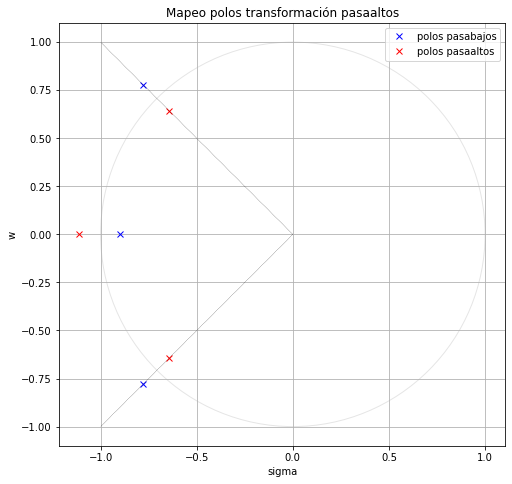

In [6]:
from matplotlib import patches

# circulo unitario
unit_circle = patches.Circle(
    (0,0), radius=1, fill=False,
    color='black', ls='solid', alpha=0.1)

# lineas a 45
x_45 = -np.linspace(0, 1)
y_45 = x_45

# polos pasabajos
p_lp = [-0.9 + 0j, 1.1 * (-0.707 + 0.707j), 1.1 * (-0.707 - 0.707j)]
# polos pasaaltos
p_hp = [1/x for x in p_lp]

# Ploteo
fig, ax = plt.subplots()
ax.add_patch(unit_circle)
ax.ticklabel_format(useOffset=False)
ax.set_xlabel('sigma')
ax.set_ylabel('w')
ax.grid(True)
title = 'Mapeo polos transformación pasaaltos'
ax.set_title(title)
for p in p_lp:
    ax.plot(np.real(p), np.imag(p), 'bx', label='polos pasabajos')
for p in p_hp:
    ax.plot(np.real(p), np.imag(p), 'rx', label='polos pasaaltos')
ax.plot(x_45, y_45, '--k', linewidth=0.25)
ax.plot(x_45, -y_45, '--k', linewidth=0.25)

# Elimino labels repetidos
handles, labels = ax.get_legend_handles_labels()
labels_dict = dict(zip(labels, handles))
leg = ax.legend(labels_dict.values(), labels_dict.keys())

# Usar misma escala ambos ejes
ax.set_aspect('equal', adjustable='box')
fig.set_size_inches(8, 8)

plt.show()

### Transformación pasabanda

El núcleo de transformación en este caso es:

### $p = K(s) = Q \cdot  \frac{s^2 + 1}{s}$

Al igual que para la transformación pasaaltos, consideraremos un prototipo pasabajos con ceros de transformación:

### $H_{LP}(p) = \frac{\sum_{k=0}^{m}{a_k \cdot  p^k}}{\sum_{k=0}^{n}{b_k \cdot  p^k}}$

Donde $m < n$.

Al aplicar la transformación el resultado es:

### $H_{BP}(s) = H_{LP}(Q \cdot  \frac{s^2 + 1}{s}) = s^{n-m} \frac{\sum_{k=0}^{2\cdot m}{c_{k} \cdot  s^k}}{\sum_{i=0}^{2\cdot n}{d_{k} \cdot  s^k}}$

El valor exacto de los nuevos $c_k$ y $d_k$ no es importante, lo que importa observar es:
- Cada polo en el pasabajos prototipo genera dos polos en el pasabanda -- suma coeficientes denominador va hasta $2\cdot n$.
- Cada cero en el pasabajos prototipo genera dos ceros en el pasabanda -- suma coeficientes numerador va hasta $2\cdot m$.
- Se generan $n-m$ polos en el origen.
  Para un pasabajos prototipos todo-polo, el número de ceros en el origen cera la mitad del orden del pasabandas.

Analizamos a continuación como la transformación afecta los polos -- si el filtro prototipo tuviera ceros, lo haría de la misma forma.
Un polo $s_{polo}$ de $H_{BP}(s)$ un polo de $H_{LP}(p)$, en:

### $p_{polo} = K(s_{polo}) = Q \cdot  \frac{s_{polo}^2 + 1}{s_{polo}}$

Despejando:

### $s_{polo}^2 - \frac{p_{polo}}{Q} \cdot  s_{polo} + 1 = 0$

Por lo que las dos soluciones son:

### $s_{polo} = \frac{p_{polo}}{2\cdot Q} \pm \sqrt{(\frac{p_{polo}}{2\cdot Q})^2 - 1}$

Si el pasabajos tenía un polo real simple, este se mapeara en dos polos del pasabanda.
Estos podran ser reales o un par de polos complejos.

Si:

### $(\frac{p_{polo}}{2\cdot Q})^2 - 1 < 0$

### $Q > \frac{|p_{polo}|}{2}$

Serán complejos conjugados.
Esta condición es siempre cierta, dadas las siguientes precondiciones:

### $|p_{polo}| < 1$

### $Q \geq 1$

La primera es cierta en la mayor parte de las funciones de aproximación usadas, por lo que si $Q > 0.5$ los polos seran complejos conjugados.
Lo segundo es ciempro cierto, ya que la definición de Q es $\frac{w_0}{BW}$, por lo que no tiene sentido un valor menor a 1.

Cada par de polos complejos conjugados del pasabajos prototipos generara dos pares de polos complejos conjugados en el filtro pasabanda.
Estos cumplen la condición de que el Q de los ambos pares de polos es el mismo -- la demostración de lo mismo es algo compleja y fuera del alcance del apunte.

En cuanto al calculo de estos dos pares de polos, podemos simplificarlo observando en ellos cierta simetría:

- $p_{polo}$ genera:

  $s_{polo\_1} = a + \alpha + j \cdot  (b + \beta)$

  $s_{polo\_2} = a - \alpha + j \cdot  (b - \beta)$

- $p^\cdot _{polo}$ genera:

  $s_{polo\_3} = a + \alpha + j \cdot  (-b - \beta)$

  $s_{polo\_4} = a - \alpha + j \cdot  (-b + \beta)$

Donde:

### $a + j \cdot  b = \frac{p_{polo}}{2\cdot Q}$

### $\alpha + j \cdot  \beta = \sqrt{(\frac{p_{polo}}{2\cdot Q})^2 - 1}$

Podemos obserbar que $s_{polo\_1}$, $s_{polo\_4}$ son un par complejo conjugado, y el otro par es $s_{polo\_2}$, $s_{polo\_3}$.
Por lo tanto, con resolver la ecuación para uno de los dos polos complejos conjugados originales podemos obtener los cuatro resultantes.

Los siguientes gráficos ilustran la transformación para un filtro de tercer orden:

NameError: name 'text' is not defined

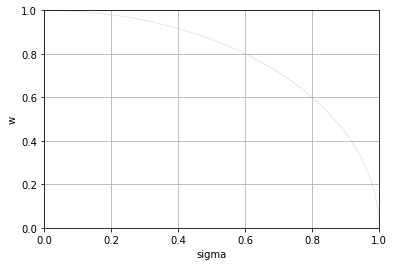

In [7]:
from scipy import signal

# polos pasabajos
p_lp = [-0.9 + 0j, 1.1 * (-0.707 + 0.707j), 1.1 * (-0.707 - 0.707j)]
b, a = signal.zpk2tf([], p_lp, 1)
# polos pasabanda 1 (alto Q)
_, p_bp, _ = signal.tf2zpk(*signal.lp2bp(b, a, wo=1, bw=1))

# circulo unitario
unit_circle = patches.Circle(
    (0,0), radius=1, fill=False,
    color='black', ls='solid', alpha=0.1)
fig, ax = plt.subplots()
ax.add_patch(unit_circle)
ax.ticklabel_format(useOffset=False)
ax.set_xlabel('sigma')
ax.set_ylabel('w')
ax.grid(True)
title = f'Mapeo polos con núcleo de transfomación pasabanda -- {text} Q'
ax.set_title(title)
for p in p_lp:
    ax.plot(np.real(p), np.imag(p), 'bx', label='polos pasabajos')
for p in p_bp:
    ax.plot(np.real(p), np.imag(p), 'rx', label='polos pasabanda')

# Elimino labels repetidos
handles, labels = ax.get_legend_handles_labels()
labels_dict = dict(zip(labels, handles))
leg = ax.legend(labels_dict.values(), labels_dict.keys())

# Usar misma escala ambos ejes
ax.set_aspect('equal', adjustable='box')
fig.set_size_inches(8, 8)

plt.show()


## Ejemplos

### Pasa Altos

Se requiere diseñar un filtro que cumpla con la siguiente plantilla:

|  $\alpha$               |  $f$  |
|-------------------------|-------|
|  $\alpha_{max}$ = 3dB   | 4KHz  |
|  $\alpha_{min}$ = 30dB  | 1KHz  |

Se pide a su vez, sintetizarlo con un circuito pasivo, y utilizar la aproximación de Chebyshev.

Como primer paso, normalizamos la plantilla:

In [ ]:
import math as m

w_p = 2 * m.pi * 4* (10 ** 3)
w_s = 2 * m.pi * (10 ** 3)

w_p_n = 1
w_s_n = w_s / w_p

print(f'w_p_n = {w_p_n}, w_s_n = {w_s_n}')

Nuestro siguiente paso, es obtener la plantilla equivalente del filtro pasabajos prototipo:

In [ ]:
w_p_lp = 1 / w_p_n
w_s_lp = 1 / w_s_n

print(f'w_p_lp = {w_p_lp}, w_s_lp = {w_s_lp}')

Ahora con la plantila del pasabajos prototipo equivalente, determinamos el orden del filtro:



In [ ]:
alpha_max = 3    # dB
alpha_min = 30   # dB

epsilon = m.sqrt(m.pow(10, 0.1 * alpha_max) - 1)
N = m.acosh((m.pow(10, alpha_min * 0.1) - 1) / (m.pow(10, alpha_max * 0.1) - 1)) / (2 * m.acosh(w_s_lp))
N = m.ceil(N)

print(f'epsilon: {epsilon}, N: {N}')


Podemos utilizar la relación recursiva de los polinomios de Chebyshev, para obtener el de segundo orden:

### $c_n(\omega) = 2 \cdot  \omega \cdot  c_{n-1}(\omega) - c_{n-2}(\omega)$

| n | $c_n$ |
|:---:|:---:|
| 0 | 1 |
| 1 | $\omega$ |
| 2 | 2$\cdot \omega^2$ - 1 |

Por lo que nos queda:

### $H(j\omega)\cdot H(-j\omega) = \frac{1}{1 + \epsilon^2 \cdot  c^2_2(w)} = \frac{1}{4\cdot  \omega^4 - 4 \cdot  \omega^2 + 2}$

Donde se aproximó $\epsilon$ a 1.

Factorizamos para obtener $H(s)$:

### $H(s)\cdot H(-s) = \frac{1}{4\cdot  s^4 + 4 \cdot  s^2 + 2} = \frac{1}{a\cdot  s^2 + b \cdot  s + c}\frac{1}{a\cdot  s^2 - b \cdot  s + c}$

### $c^2 = 2$

### $a^2 = 4$

### $2\cdot a\cdot c - b^2 = 4$

Y resolviendo:

### $a = 2$

### $b = 2 \cdot  \sqrt{\sqrt{2}-1} \simeq 1.287$  

### $c = \sqrt{2} \simeq 1.414$

### $H(s) = \frac{1}{a\cdot  s^2 + b \cdot  s + c} \simeq \frac{1}{2\cdot  s^2 + 1.287 \cdot  s + 1.414}$

Utilizaremos en este ejemplos la transformación en frecuencia a nivel componentes, por lo que primero sintetizaremos el prototipo pasabajos.
Para lo mismo, utilizaremos una etapa RLC de segundo orden:

![circuito pasivo pasabajos](transformacion_en_frecuencia/pasabajos_pasivo_segundo_orden.png)

La cual tiene una transferencia:

### $H(s) = \frac{1/(s\cdot C)}{s\cdot L + 1/(s\cdot C) + R} = \frac{1}{L\cdot C}\frac{1}{s^2 + s\cdot  R/L + 1/(L\cdot C)}$

Teniendo en cuenta la transferencia deseada --y sin darle importancia al factor de ganancia--, obtenemos los componentes:

### $\frac{R}{L} \simeq 1.287/2 \simeq 0.644$

### $\frac{1}{L\cdot C} \simeq \frac{1.414}{2} \simeq 0.707$

Eligiendo $R=1$ nos queda:

### $R = 1$

### $L \simeq 1.553$

### $C \simeq 0.911$

Ahora, transformaremos el circuito pasabajos a un pasaaltos,
Para esto, hacemos uso de la función de transformación $p = K(s)= 1/s$.
Aplicamos la misma a las impedancias del capacitor, inductor y resistor:

### $Z_{lp\_R} (p) = R = Z_{hp\_R} (s)$

### $Z_{lp\_L} (p) = p\cdot L = \frac{L}{s} = \frac{1}{C_{eq}\cdot s} = Z_{hp\_C} (s)$

### $Z_{lp\_C} (p) = \frac{1}{p\cdot C} = \frac{s}{C} = L_{eq} \cdot  s = Z_{hp\_L} (s)$

Donde:

### $C_{eq} = 1/L \simeq 0.644$

### $L_{eq} = 1/C \simeq 1.098$

Vemos que el inductor se transforma en un capacitor al hacer la transformación, y el capacitor en un inductor.

El circuito final, es el siguiente [pasa_altos.asc](./transformacion_en_frecuencia/pasa_altos.asc):

![circuito normalizado](transformacion_en_frecuencia/circuito_pasaaltos_normalizado.png)
![transferencia circuito normalizado](transformacion_en_frecuencia/transferencia_pasaaltos_normalizado.png)
![atenuación en $\omega_s$](transformacion_en_frecuencia/atenuacion_minima_pasaaltos_normalizado.png)

Al observar la respuesta en frecuencia, hay que tener en cuenta que el circuito presenta un sobrepico de aproximadamente 3dB.
Por lo tanto, la atenuacion en $f=\frac{1}{2\cdot \pi}=0.158$ es de $(0 + 3)dB$, como se esperaba.
La atenuacion en $f=\frac{0.25}{2\cdot \pi}=0.0397$ es de $(27 + 3)dB = 30dB$, satisfaciendo la plantilla.

El último paso necesario es desnormalizar el circuito, lo cual se lo deja como ejercicio al lector.

### Pasabanda

<!--
Un pasabanda Butterworth activo bien sencillo (orden lp 1 o 2).
Estaria bueno incluir resolucion de polos luego de transformar, tanto como resolucion por mapeo de polos!
-->

Se requiere diseñar un filtro que cumpla con la siguiente plantilla:

| $\alpha$ | $f$ |
|:---:|:---:|
| $\alpha_{max}$ = 3dB | 0.9MHz a 1.1111111MHz |
| $\alpha_{min}$ = 15dB| f <= 0.6MHz, f >= 1.5MHz |

Se pide a su vez, sintetizarlo con un circuito activo y utilizar un filtro máxima planicidad.

Empezamos por desnormalizar la plantilla:


In [14]:
import math as m

w_p1 = 9e5
w_p2 = 1.11111111111e6
w_s1 = 6e5
w_s2 = 1.5e6

w0 = m.sqrt(w_p1 * w_p2)

print(f'w0={w0}')

w0_n = 1
w_p1_n = w_p1 / w0
w_p2_n = w_p2 / w0
w_s1_n = w_s1 / w0
w_s2_n = w_s2 / w0

print(f'w0_n={w0_n}')
print(f'w_p1_n={w_p1_n}, w_p2_n={w_p2_n}')
print(f'w_s1_n={w_s1_n}, w_s2_n={w_s2_n}')

w0=999999.9999995
w0_n=1
w_p1_n=0.90000000000045, w_p2_n=1.1111111111105556
w_s1_n=0.6000000000003, w_s2_n=1.50000000000075


Ahora, usamos el núcleo de transformación:

### $K(s)= Q \cdot \frac{s^2 + 1}{s}$

Donde todavía tenemos que calcular el $Q$:

In [15]:
BW_n = w_p2_n - w_p1_n
Q = w0_n / BW_n
print(f'Q={Q}')

Q=4.736842105285719


Con esto, ya podemos calcular la $\Omega_p$ y $\Omega_s$ correspondientes del pasabajos prototipo:

In [16]:
Omega_p1 = Q * (w_p1_n ** 2 - 1) / w_p1_n
Omega_p2 = Q * (w_p2_n ** 2 - 1) / w_p2_n
Omega_s1 = Q * (w_s1_n ** 2 - 1) / w_s1_n
Omega_s2 = Q * (w_s2_n ** 2 - 1) / w_s2_n

print(f'Omega_p1={Omega_p1}, Omega_p2={Omega_p2}')
print(f'Omega_s1={Omega_s1}, Omega_s2={Omega_s2}')

Omega_p1=-1.0, Omega_p2=1.0000000000000004
Omega_s1=-5.052631578966065, Omega_s2=3.9473684210765643


Tanto $\Omega_p1$ como $\Omega_p2$ son iguales a 1, como se esperaba (salvo un error numérico).
En el caso de $Omega_s1$ y $Omega_s2$, tenemos la que elegir la que nos imponga un requisito más exigente.
Eso es, la más chica en módulo:

$\Omega_p = 1$

$\Omega_s = 3.9474$

La otra forma de obtener $\Omega_s$, es ver cual de las siguientes relaciones es mas pequeña:

$\frac{\omega_0}{\omega_{s1}}, \frac{\omega_{s2}}{\omega_0}$

In [17]:
c1 = w0_n / w_s1_n
c2 = w_s2_n / w0_n

print(f'w_0/w_s1 = {c1}, w_s2/w_0 = {c2}')

w_0/w_s1 = 1.6666666666658334, w_s2/w_0 = 1.50000000000075


En este caso, el segundo cociente es el más chico de ambos.
Eso significa, que $\omega_{s2}$ es la más "cercana" (geometricamente) a la frecuencia central, y es la que nos pondra un requisito de atenuación mínima más exigente.
Esto coincide con los calculos realizados anteriormente.

A continuación, debemos determinar el orden del filtro Butterworth:

In [ ]:
alpha_max = 3
alpha_min = 15
Omega_s = Omega_s2

epsilon = m.sqrt(10 ** (alpha_max/10) - 1)
N = m.log10((10 ** (alpha_min/10) - 1) / (10 ** (alpha_max/10) - 1)) / 2 / m.log10(Omega_s)
N = m.ceil(N)
print(f'epsilon={epsilon}, N={N}')

La respuesta en modulo de un filtro de segundo orden Butterworth es:

### $H_{LP}(j\Omega) \cdot H_{LP}(-j\Omega) = \frac{1}{1 + \epsilon^2 \cdot \Omega^4} = \frac{1}{1 + \Omega^4}$

Factorizando nos queda:

### $H_{LP}(p) = \frac{1}{p^2 + \sqrt{2} \cdot p + 1}$

En este caso se pide diseñar un circuito activo.
La transformación de componentes no nos va a servir acá, porqué un capacitor se transformará en el paralelo de un inductor y un capacitor.

En este caso vamos a usar la transformación para obtener la transferencia del pasabanda:

### $H(s) = H_{LP}(Q \cdot \frac{s^2 + 1}{s}) = \frac{s^2}{Q^2 \cdot (s^4 + 2 \cdot s^2 + 1) + \sqrt{2} \cdot Q \cdot (s^3 + s) + s^2}$

### $H(s) = \frac{1}{Q^2} \cdot \frac{s^2}{s^4 + s^3 \cdot \sqrt{2} / Q + (2 + 1 / Q^2) \cdot s^2 + s \cdot \sqrt{2} / Q + 1}$

Para factorizar, vamos a calcular los ceros del polinomio denominador:

In [ ]:
import numpy as np

den = [1, m.sqrt(2) / Q, 2 + 1 / (Q ** 2), m.sqrt(2) / Q, 1]
roots = np.roots(den)

print(f'roots: {roots}')

Hay otra forma distinta de obtener el mismo resultado, que es obtener los polos del pasabajos y mapearlos según la transformación:

### $p_{polo\_1} = -\frac{\sqrt{2}}{2} + j \frac{\sqrt{2}}{2}$

### $p_{polo\_2} = -\frac{\sqrt{2}}{2} - j \frac{\sqrt{2}}{2}$

### $p_{polo} = Q \cdot \frac{s^2 + 1}{s}$

### $s^2 - \frac{p_{polo}}{Q} \cdot s + 1 = 0$

Y resolviendo esta última ecuación para $p_{polo\_1}$ y $p_{polo\_2}$ obtenemos (lo cual requiere hacer calculos algebraicos con números complejos):

In [ ]:
polos_pasabajos = [-m.sqrt(2)/2 + 1j * m.sqrt(2)/2, -m.sqrt(2)/2 - 1j * m.sqrt(2)/2]
polos_pasabanda = []

for p in polos_pasabajos:
    termino_comun = - p / 2 / Q
    raiz_discriminante = np.sqrt((termino_comun ** 2) - 1)
    polos_pasabanda.append(-termino_comun + raiz_discriminante)
    polos_pasabanda.append(-termino_comun - raiz_discriminante)

print(f'roots: {polos_pasabanda}')

Lo cual coincide con los polos calculados anteriormente.

Lo que nos queda para finalizar es sintetizar cada una de estas dos etapas con un circuito activo.
Para esto, podemos utilizar por ejemplo el circuito de Akerberg-Mossberg:

![circuito Akerberg-Mossberg](transformacion_en_frecuencia/akerberg_mossberg.png)

La salida del primer operacional ($U_1$), se comporta como un pasabanda de segundo orden.
Por lo tanto, para diseñar el circuito necesitaremos cascadear dos etapas, donde cada una de ellas sintetizaran las siguientes transferencias:

In [ ]:
polos_etapa_1 = roots[2]  # Y su conjugado
parte_real = polos_etapa_1.real
w0_polo = abs(polos_etapa_1)
print(f'denominador etapa 1: s^2+{-2*parte_real}*s+{w0_polo ** 2}')

polos_etapa_2 = roots[1]  # Y su conjugado
parte_real = polos_etapa_2.real
w0_polo = abs(polos_etapa_2)
print(f'denominador etapa 2: s^2+{-2*parte_real}*s+{w0_polo ** 2}')

### $H_1(s) = \frac{1}{Q} \cdot \frac{s}{s^2 + s\cdot 0.138 + 0.861}$

### $H_2(s) = \frac{1}{Q} \cdot \frac{s}{s^2 + s\cdot 0.160 + 1.161}$

Se deja como ejercicio obtener la transferencia del circuito Akerberg-Mosberg y completar la síntesis.

Para finalizar, verificamos que la transferencia normalizada sea correcta:

In [ ]:
from scipy import signal

num = [1 / (Q ** 2), 0, 0]
filtro = signal.TransferFunction(num, den)

w, mag, _ = filtro.bode()
vertical = np.linspace(min(mag), max(mag))

plt.figure()
plt.semilogx(w, mag, '-b')    # Bode magnitude plot
plt.grid(True)
plt.xlabel('Angular frequency [rad/sec]')
plt.ylabel('Magnitude response [dB]')
plt.title('Frequency response')

plt.semilogx(w, [-alpha_max] * len(w), '-r')
plt.semilogx(w, [-alpha_min] * len(w), '-r')
plt.semilogx([0.9] * len(vertical), vertical, '-g')
plt.semilogx([1.11111111] * len(vertical), vertical, '-g')
plt.semilogx([0.6] * len(vertical), vertical, '-m')
plt.semilogx([1.5] * len(vertical), vertical, '-m')

## Resumen transformación componentes

TBD

<!--Incluir tabla equivalentes aca-->